**Preparing dataset for Logistic Regression and testing the model**



For this exercise, we will be using logistic regression using a dataset from: https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data about the prediction of Breast Cancer if it's Malignant (M) or Benign (B)

By the end of this exercise:
- You will learn how to answer assumptions of the model before using it.
- You will learn here how to split dataset into two subsets: train set and test set and how they are fed into the model. 
- Lastly, you will learn how to evaluate this model using the metrics we discussed in our lectures. 

NOTE that the focus of this lesson is to simply show you how to evaluate a model so we will not be dealing much with data-preprocessing such as handling outliers.

In [ ]:
pip install bioinfokit

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


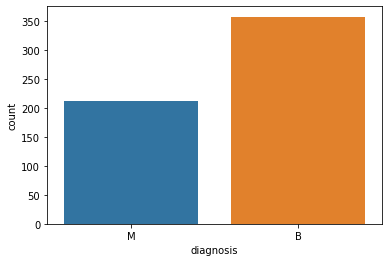

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import bioinfokit
from bioinfokit import visuz
from sklearn.preprocessing import LabelEncoder
import matplotlib.image as mpimg
from statsmodels.stats.outliers_influence import variance_inflation_factor

df = pd.read_csv('drive/MyDrive/datasets/data.csv')

import seaborn as sns
ax = sns.countplot(x='diagnosis', data=df)
plt.show()


We can see that we have imbalanced dataset which is normal for real-world data. In practice, there should be NO significant differences between the two or more classes. For the sake of the discussion, let's use the data as is. 

If you feel like exploring on ways to deal with imbalanced classes, here's a good article for it: https://www.analyticsvidhya.com/blog/2020/07/10-techniques-to-deal-with-class-imbalance-in-machine-learning/

In [ ]:
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


Looking at the dataset, we can see that we have 569 records and 33 unfiltered features. 

In [ ]:
df.shape

(569, 33)

When using a model for your researches, just like in statistical tests, you need to satisfy its assumption first. Logistic Regression has the following assumptions  [(Stolzfus, 2011)](https://pubmed.ncbi.nlm.nih.gov/21996075/#:~:text=Basic%20assumptions%20that%20must%20be,lack%20of%20strongly%20influential%20outliers.):


- Independence of errors
- Linearity in the logit for continuous variables
- **absence of multicollinearity**
- lack of strongly influential outliers.

For the sake of discussion, let's assume that the assumptions mentioned above are satisfied other than absence of multicollinearity.

Multicollinearity can also provide us an oppurtinity to select only features that are important for our model hence, improved effieciency due to less data for processing. 

**Detecing Multi-Colinearity**
1. Correlation Matrix

The matrix shows you which features are highlighy correlated with each other. The value ranges from 1 to -1.

- -1 indicates a perfectly negative linear correlation between two variables
- 0 indicates no linear correlation between two variables
- 1 indicates a perfectly positive linear correlation between two variables

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


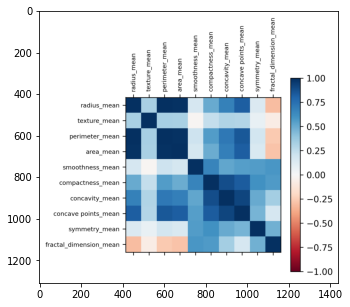

In [ ]:
X = df.iloc[:,2:12]
visuz.stat.corr_mat(df=X, cmap='RdBu')

img = mpimg.imread('corr_mat.png')
imgplot = plt.imshow(img)
plt.show()

2. VIF

Let's perform VIF to detect multi collinearity. We want to rule out features that are highly correlated with one another. This is done for feature selection and to also satsify our assumptions.

Typically, a VIF value exceeding 5 or 10 is deemed to be too high. Any feature with such VIF values is likely to be contributing to multicollinearity.

NOTE: We added a new column named 'intercept' because VIF requires us to have it. But we'll remove it afterwards. 

In [ ]:
X['intercept'] = 1

def computeVIF(X): 
  # create dataframe to store vif values
  vif = pd.DataFrame()
  vif["Variable"] = X.columns
  vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
  vif = vif[vif['Variable']!='intercept']
  return vif

X_selected = X
computeVIF(X)


,Variable,VIF
0,radius_mean,1606.805835
1,texture_mean,1.186978
2,perimeter_mean,1956.135364
3,area_mean,56.283984
4,smoothness_mean,2.957080
5,compactness_mean,22.619498
6,concavity_mean,11.715217
7,concave points_mean,21.711976
8,symmetry_mean,1.778451
9,fractal_dimension_mean,6.472842


We can see that only texture_mean, smoothness_mean, symmetry_mean, and fractal_dimension_mean has low acceptable VIF. The most ideal thing to do here is NOT to remove all features with high VIF as one. Instead, remove them one by one removing the feature with the highest VIF first. 

In [ ]:
X_selected = X.loc[:, X.columns != 'perimeter_mean']
computeVIF(X_selected)

,Variable,VIF
0,radius_mean,62.730399
1,texture_mean,1.186706
2,area_mean,50.145150
3,smoothness_mean,2.904024
4,compactness_mean,11.890585
5,concavity_mean,11.400681
6,concave points_mean,21.620461
7,symmetry_mean,1.769178
8,fractal_dimension_mean,6.192637


In [ ]:
X_selected = X.loc[:, (X.columns != 'perimeter_mean') & (X.columns != 'radius_mean') ]
computeVIF(X_selected)

,Variable,VIF
0,texture_mean,1.186143
1,area_mean,7.843636
2,smoothness_mean,2.891604
3,compactness_mean,9.414068
4,concavity_mean,10.905729
5,concave points_mean,20.921207
6,symmetry_mean,1.757777
7,fractal_dimension_mean,4.490606


In [ ]:
X_selected = X.loc[:, 
                      (X.columns != 'perimeter_mean') & 
                      (X.columns != 'radius_mean') &
                      (X.columns != 'concave points_mean') 
                      ]
computeVIF(X_selected)

,Variable,VIF
0,texture_mean,1.185704
1,area_mean,4.768319
2,smoothness_mean,2.188780
3,compactness_mean,8.612101
4,concavity_mean,7.378662
5,symmetry_mean,1.746435
6,fractal_dimension_mean,4.312677


In [ ]:
X_selected = X.loc[:, 
                      (X.columns != 'perimeter_mean') & 
                      (X.columns != 'radius_mean') &
                      (X.columns != 'concave points_mean') &
                      (X.columns != 'compactness_mean') 
                      ]
computeVIF(X_selected)

,Variable,VIF
0,texture_mean,1.173247
1,area_mean,4.471599
2,smoothness_mean,2.098786
3,concavity_mean,4.921308
4,symmetry_mean,1.686023
5,fractal_dimension_mean,3.311538


With that, we can see that the 6 columns above (except intercept) has VIF lower than 5. We will then use these features for our model

**Splitting the Model into two subsets**

train_test_split() has commonly three parameters. X samples (features), Y (actual value), and the pecentage of the test set. For this case, I'll use 0.20, which means the testset is 20% and trainset is 80%.

There are many ways you can do about train-set split. But for this demonstration, we'll use the common 80-20 split. Here's the link: https://machinelearningmastery.com/train-test-split-for-evaluating-machine-learning-algorithms/

In [ ]:
#remove the intercept. It's only for VIF
X_selected = X_selected.drop('intercept', 1)
print(X_selected)

     texture_mean  area_mean  smoothness_mean  concavity_mean  symmetry_mean  \
0           10.38     1001.0          0.11840         0.30010         0.2419   
1           17.77     1326.0          0.08474         0.08690         0.1812   
2           21.25     1203.0          0.10960         0.19740         0.2069   
3           20.38      386.1          0.14250         0.24140         0.2597   
4           14.34     1297.0          0.10030         0.19800         0.1809   
..            ...        ...              ...             ...            ...   
564         22.39     1479.0          0.11100         0.24390         0.1726   
565         28.25     1261.0          0.09780         0.14400         0.1752   
566         28.08      858.1          0.08455         0.09251         0.1590   
567         29.33     1265.0          0.11780         0.35140         0.2397   
568         24.54      181.0          0.05263         0.00000         0.1587   

     fractal_dimension_mean  
0        

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [ ]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

Y = df['diagnosis']
#split this model to train set and test set
X_train, X_test, y_train, y_test = train_test_split(X_selected, Y, test_size=0.20, random_state=0)


**Training the model**

As mentioned earlier, we wil be using Logistic Regression for our dataset.

In [ ]:
from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(X_train, y_train)

#Method which can modify the threshold
def predict(classifier,X, threshold=None):
        if threshold == None: # If no threshold passed in, simply call the base class predict, effectively threshold=0.5
            return classifier.predict(X)
        else:
            y_scores = classifier.predict_proba(X)[:, 1]
            y_pred_with_threshold = (y_scores >= threshold).astype(str)
            list1 = pd.Series(y_pred_with_threshold) 
            list1 = list1.map({'True': 'M', 'False': 'B'}).astype(object)
            y_pred_with_threshold = list1.to_numpy(dtype=object)

            return y_pred_with_threshold

y_pred = predict(logreg,X_test, 0.5)

**Testing the Model for Evaluation**

1. Confusion Matrix - Looking at the Confusion matrix, we can see that we have a reasonable amount of TPs relative to TNs which is a good sign. 

In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

confusion_matrix = confusion_matrix(y_test, y_pred)

tp = confusion_matrix[0][0]
fn = confusion_matrix[0][1]
fp = confusion_matrix[1][0]
tn = confusion_matrix[1][1]

print('Confusion matrix : \n',confusion_matrix)


Confusion matrix : 
 [[63  4]
 [ 7 40]]


2. Accuracy - We see that we have high accuracy of 90%.

In [ ]:
print('Accuracy: \n', ((tp + tn)/(tp+fn+fp+tn)))

Accuracy: 
 0.9035087719298246


3. Precision & Recall, and F1 score 
  - Of the entire test set, the model predicted benign and malignant tumors 90%/91% of the time. Additionally, the model predicted correctly 94%/85% of actual benign/malignant correctly. 


In [ ]:
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1score = 2 * ((precision*recall)/(precision+recall))

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1score)

Precision: 0.9
Recall: 0.9402985074626866
F1-score: 0.9197080291970803


4. ROC Curve and AUC - Take note that ROC requires float values for the predicted values. As of the moment, our classes are named B and M. We need to convert them to numerical values first. Let's set B = 0 and M = 1.

There are two options for this, use:
- Label Encoding - We will use this! Make B = 0, M = 1. 
- One Hot Encoder

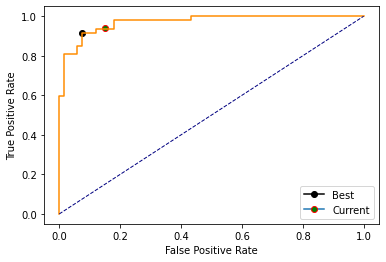

Area Under Curve:  0.9701492537313433


In [ ]:
#Label encoding using the method map(). This method only works for panda series only. 
y_test_new = y_test.map({'M': 1, 'B': 0}).astype(int)

from sklearn import metrics
import math

#compute ROC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, proba = metrics.roc_curve(y_test_new,  y_pred_proba)
auc = metrics.auc(fpr, tpr)

#Plot the current fpr, and tpr
tpr_curr = (tp / (tp + fn))
fpr_curr = (fp / (tn + fp))

#Getting gmeans to plot the point for the best threshold
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

#Plot ROC curve
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot(fpr_curr,tpr_curr, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green", label='Current')
plt.plot(fpr,tpr,color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.legend()
plt.show()

#Compute AUC
print('Area Under Curve: ', auc)

**Getting the optimal classification threshold**

For this, well be using Youden's J Statistic and Gmean. You can learn more about the metrics here: 
- Youden-s J Stats: https://en.wikipedia.org/wiki/Youden%27s_J_statistic
- Gmean: https://towardsdatascience.com/optimal-threshold-for-imbalanced-classification-5884e870c293

This resource shows you how to implement another way to find the optimal threshold: https://www.kaggle.com/code/nicholasgah/obtain-optimal-probability-threshold-using-roc/notebook

Based on the results obtained from both metrics, the optimal threshold that you can use is **0.44**. 

In [ ]:
#using  Youden's J Statistic.
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), proba)), key=lambda i: i[0], reverse=True)[0][1]
print('Best Threshold=', optimal_proba_cutoff)

#using Gmeans
print('Best Threshold= %f, G-Mean= %.3f' % (proba[ix], gmeans[ix]))

Best Threshold= 0.43839106413145207
Best Threshold= 0.438391, G-Mean= 0.920


Performance Task 1:

Create your report answering the following: 

1. Now that you obtained the optimal value, change the threshold to that value instead and check the evaluation metrics if they improved. Provide another threshold and measure its metrics as well. Compare. What changed? Is the optimal threshold really the optimal one?

2. Add one more classifier. Train(Test) it using the same train(test) set that logistic regression was trained(tested) for. Use threshold values: random, default=0.5, and optimal.Compare their evaluation metrics and prove that the optimal threshold is the best for that model. Choose among the following: https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/

Comparison looks like this:

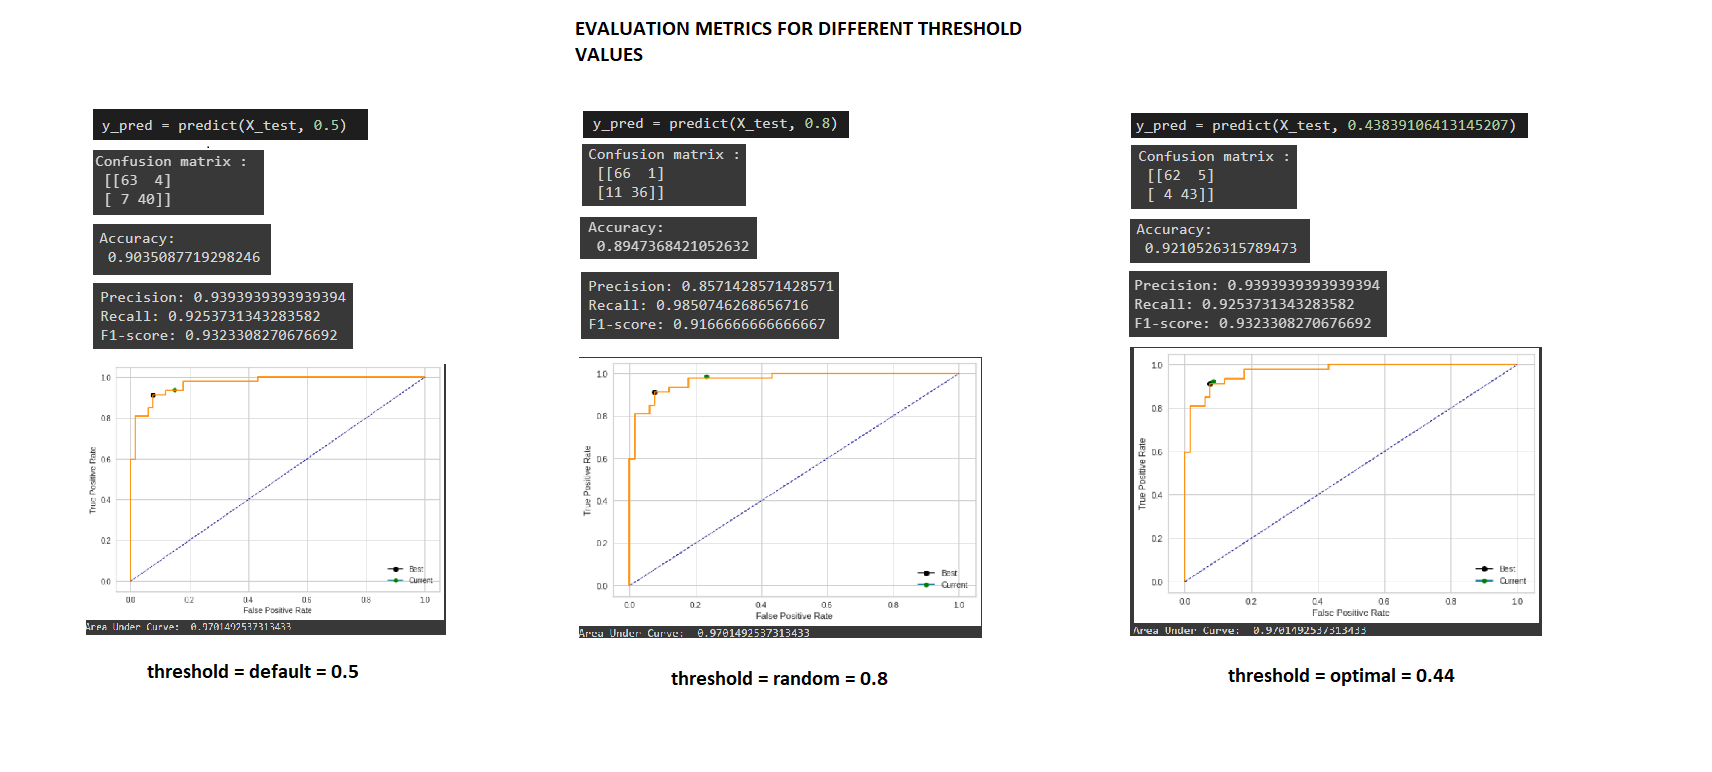

3. Compare the two models in terms of their ROCs and AUC. Which one is the best? Explain. Add screenshots

NOTE: Ignore the assumptions for now. Just use the refined dataset for the new classifier

# Answers

## Task 1
Now that you obtained the optimal value, change the threshold to that value instead and check the evaluation metrics if they improved. Provide another threshold and measure its metrics as well. Compare. What changed? Is the optimal threshold really the optimal one?

In [ ]:
y_pred = predict(logreg,X_test, 0.43839106413145207)

Confusion matrix : 
 [[62  5]
 [ 4 43]]
Accuracy: 
 0.9210526315789473
Precision: 0.9393939393939394
Recall: 0.9253731343283582
F1-score: 0.9323308270676692


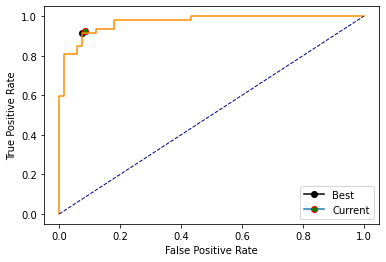

Area Under Curve:  0.9701492537313433


In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

tp = confusion_matrix[0][0]
fn = confusion_matrix[0][1]
fp = confusion_matrix[1][0]
tn = confusion_matrix[1][1]

print('Confusion matrix : \n',confusion_matrix)



print('Accuracy: \n', ((tp + tn)/(tp+fn+fp+tn)))
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1score = 2 * ((precision*recall)/(precision+recall))

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1score)
y_test_new = y_test.map({'M': 1, 'B': 0}).astype(int)

from sklearn import metrics
import math

#compute ROC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, proba = metrics.roc_curve(y_test_new,  y_pred_proba)
auc = metrics.auc(fpr, tpr)

#Plot the current fpr, and tpr
tpr_curr = (tp / (tp + fn))
fpr_curr = (fp / (tn + fp))

#Getting gmeans to plot the point for the best threshold
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

#Plot ROC curve
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot(fpr_curr,tpr_curr, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green", label='Current')
plt.plot(fpr,tpr,color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.legend()
plt.show()

#Compute AUC
print('Area Under Curve: ', auc)

### Trying 0.47 as a treshold

In [ ]:
y_pred = predict(logreg,X_test, 0.47)

Confusion matrix : 
 [[62  5]
 [ 6 41]]
Accuracy: 
 0.9035087719298246
Precision: 0.9117647058823529
Recall: 0.9253731343283582
F1-score: 0.9185185185185185


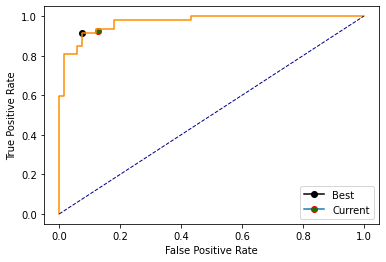

Area Under Curve:  0.9701492537313433


In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

tp = confusion_matrix[0][0]
fn = confusion_matrix[0][1]
fp = confusion_matrix[1][0]
tn = confusion_matrix[1][1]

print('Confusion matrix : \n',confusion_matrix)



print('Accuracy: \n', ((tp + tn)/(tp+fn+fp+tn)))
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1score = 2 * ((precision*recall)/(precision+recall))

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1score)
y_test_new = y_test.map({'M': 1, 'B': 0}).astype(int)

from sklearn import metrics
import math

#compute ROC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, proba = metrics.roc_curve(y_test_new,  y_pred_proba)
auc = metrics.auc(fpr, tpr)

#Plot the current fpr, and tpr
tpr_curr = (tp / (tp + fn))
fpr_curr = (fp / (tn + fp))

#Getting gmeans to plot the point for the best threshold
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

#Plot ROC curve
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot(fpr_curr,tpr_curr, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green", label='Current')
plt.plot(fpr,tpr,color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.legend()
plt.show()

#Compute AUC
print('Area Under Curve: ', auc)

### Trying 0.39 as a treshold

In [ ]:
y_pred = predict(logreg,X_test, 0.39)

Confusion matrix : 
 [[61  6]
 [ 4 43]]
Accuracy: 
 0.9122807017543859
Precision: 0.9384615384615385
Recall: 0.9104477611940298
F1-score: 0.9242424242424243


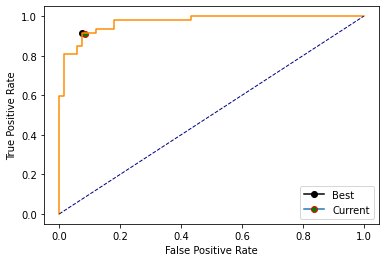

Area Under Curve:  0.9701492537313433


In [ ]:
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

tp = confusion_matrix[0][0]
fn = confusion_matrix[0][1]
fp = confusion_matrix[1][0]
tn = confusion_matrix[1][1]

print('Confusion matrix : \n',confusion_matrix)



print('Accuracy: \n', ((tp + tn)/(tp+fn+fp+tn)))
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1score = 2 * ((precision*recall)/(precision+recall))

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1score)
y_test_new = y_test.map({'M': 1, 'B': 0}).astype(int)

from sklearn import metrics
import math

#compute ROC
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, proba = metrics.roc_curve(y_test_new,  y_pred_proba)
auc = metrics.auc(fpr, tpr)

#Plot the current fpr, and tpr
tpr_curr = (tp / (tp + fn))
fpr_curr = (fp / (tn + fp))

#Getting gmeans to plot the point for the best threshold
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

#Plot ROC curve
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot(fpr_curr,tpr_curr, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green", label='Current')
plt.plot(fpr,tpr,color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.legend()
plt.show()

#Compute AUC
print('Area Under Curve: ', auc)

By comparing 2 different threshold with +/- 4 difference from the optimal threshold (0.43839106413145207). We can see that the scores in the evaluation metrics got lower which can be observed below.

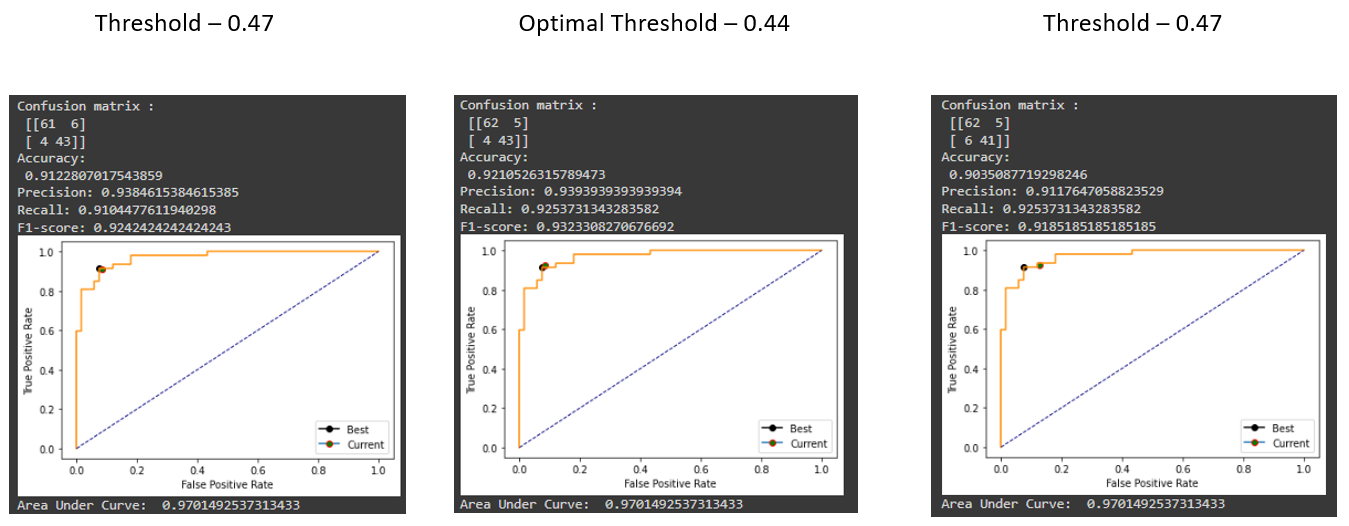

## Task 2
Add one more classifier. Train(Test) it using the same train(test) set that logistic regression was trained(tested) for. Use threshold values: random, default=0.5, and optimal.Compare their evaluation metrics and prove that the optimal threshold is the best for that model. Choose among the following: https://stackabuse.com/overview-of-classification-methods-in-python-with-scikit-learn/

In [ ]:
from sklearn.svm import SVC
svm = SVC(probability=True)
svm.fit(X_train, y_train)

SVC(probability=True)

### Comparing 3 threshold values for support vector machine

Confusion matrix : 
 [[66  1]
 [16 31]]
Accuracy: 
 0.8508771929824561
Precision: 0.8048780487804879
Recall: 0.9850746268656716
F1-score: 0.8859060402684563


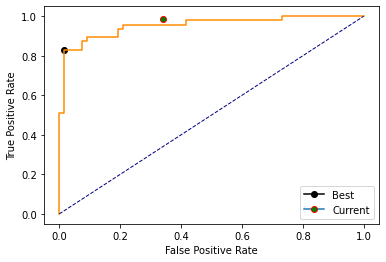

Area Under Curve:  0.9530009526833915


In [ ]:
# Random Value
y_pred = predict(svm,X_test, 0.8)

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

tp = confusion_matrix[0][0]
fn = confusion_matrix[0][1]
fp = confusion_matrix[1][0]
tn = confusion_matrix[1][1]

print('Confusion matrix : \n',confusion_matrix)



print('Accuracy: \n', ((tp + tn)/(tp+fn+fp+tn)))
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1score = 2 * ((precision*recall)/(precision+recall))

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1score)
y_test_new = y_test.map({'M': 1, 'B': 0}).astype(int)

#compute ROC
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, proba = metrics.roc_curve(y_test_new,  y_pred_proba)
auc = metrics.auc(fpr, tpr)

#Plot the current fpr, and tpr
tpr_curr = (tp / (tp + fn))
fpr_curr = (fp / (tn + fp))

#Getting gmeans to plot the point for the best threshold
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

#Plot ROC curve
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot(fpr_curr,tpr_curr, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green", label='Current')
plt.plot(fpr,tpr,color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.legend()
plt.show()

#Compute AUC
print('Area Under Curve: ', auc)

**Finding the optimal value using the 2 metrics**

In [ ]:
#using  Youden's J Statistic.
optimal_proba_cutoff = sorted(list(zip(np.abs(tpr - fpr), proba)), key=lambda i: i[0], reverse=True)[0][1]
print('Best Threshold=', optimal_proba_cutoff)

#using Gmeans
print('Best Threshold= %f, G-Mean= %.3f' % (proba[ix], gmeans[ix]))

Best Threshold= 0.5505683563776298
Best Threshold= 0.550568, G-Mean= 0.904


Confusion matrix : 
 [[66  1]
 [ 8 39]]
Accuracy: 
 0.9210526315789473
Precision: 0.8918918918918919
Recall: 0.9850746268656716
F1-score: 0.9361702127659575


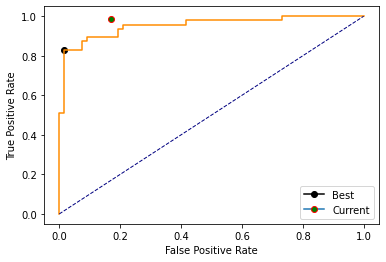

Area Under Curve:  0.9530009526833915


In [ ]:
# Default Value
y_pred = predict(svm,X_test, 0.5)

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

tp = confusion_matrix[0][0]
fn = confusion_matrix[0][1]
fp = confusion_matrix[1][0]
tn = confusion_matrix[1][1]

print('Confusion matrix : \n',confusion_matrix)



print('Accuracy: \n', ((tp + tn)/(tp+fn+fp+tn)))
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1score = 2 * ((precision*recall)/(precision+recall))

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1score)
y_test_new = y_test.map({'M': 1, 'B': 0}).astype(int)

#compute ROC
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, proba = metrics.roc_curve(y_test_new,  y_pred_proba)
auc = metrics.auc(fpr, tpr)

#Plot the current fpr, and tpr
tpr_curr = (tp / (tp + fn))
fpr_curr = (fp / (tn + fp))

#Getting gmeans to plot the point for the best threshold
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

#Plot ROC curve
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot(fpr_curr,tpr_curr, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green", label='Current')
plt.plot(fpr,tpr,color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.legend()
plt.show()

#Compute AUC
print('Area Under Curve: ', auc)

Confusion matrix : 
 [[66  1]
 [ 8 39]]
Accuracy: 
 0.9210526315789473
Precision: 0.8918918918918919
Recall: 0.9850746268656716
F1-score: 0.9361702127659575


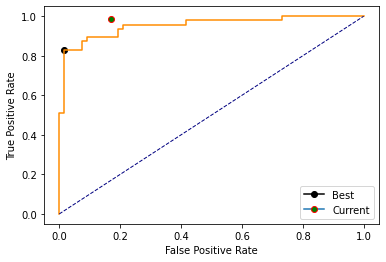

Area Under Curve:  0.9530009526833915


In [ ]:
# Optimal Value
y_pred = predict(svm,X_test, 0.5505683563776298)

from sklearn.metrics import confusion_matrix, plot_confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)

tp = confusion_matrix[0][0]
fn = confusion_matrix[0][1]
fp = confusion_matrix[1][0]
tn = confusion_matrix[1][1]

print('Confusion matrix : \n',confusion_matrix)



print('Accuracy: \n', ((tp + tn)/(tp+fn+fp+tn)))
precision = tp / (tp + fp)
recall = tp / (tp + fn)
f1score = 2 * ((precision*recall)/(precision+recall))

print('Precision:', precision)
print('Recall:', recall)
print('F1-score:', f1score)
y_test_new = y_test.map({'M': 1, 'B': 0}).astype(int)

#compute ROC
y_pred_proba = svm.predict_proba(X_test)[::,1]
fpr, tpr, proba = metrics.roc_curve(y_test_new,  y_pred_proba)
auc = metrics.auc(fpr, tpr)

#Plot the current fpr, and tpr
tpr_curr = (tp / (tp + fn))
fpr_curr = (fp / (tn + fp))

#Getting gmeans to plot the point for the best threshold
gmeans = np.sqrt(tpr * (1-fpr))
ix = np.argmax(gmeans)

#Plot ROC curve
plt.plot(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
plt.plot(fpr_curr,tpr_curr, marker="o", markersize=6, markeredgecolor="red", markerfacecolor="green", label='Current')
plt.plot(fpr,tpr,color="darkorange")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.plot([0, 1], [0, 1], color="navy", lw=1, linestyle="--")
plt.legend()
plt.show()

#Compute AUC
print('Area Under Curve: ', auc)

**By comparing the results in evaluation metrics with different value of threshold, Optimal threshold (0.55) is still the best for the model but the score is tied with the default value (0.5). With 0.05 difference on the two, it looks like the threshold value is not that sensitive with SVM compare to logistic regression. The comparison of different threshold values for SVM can be observed below.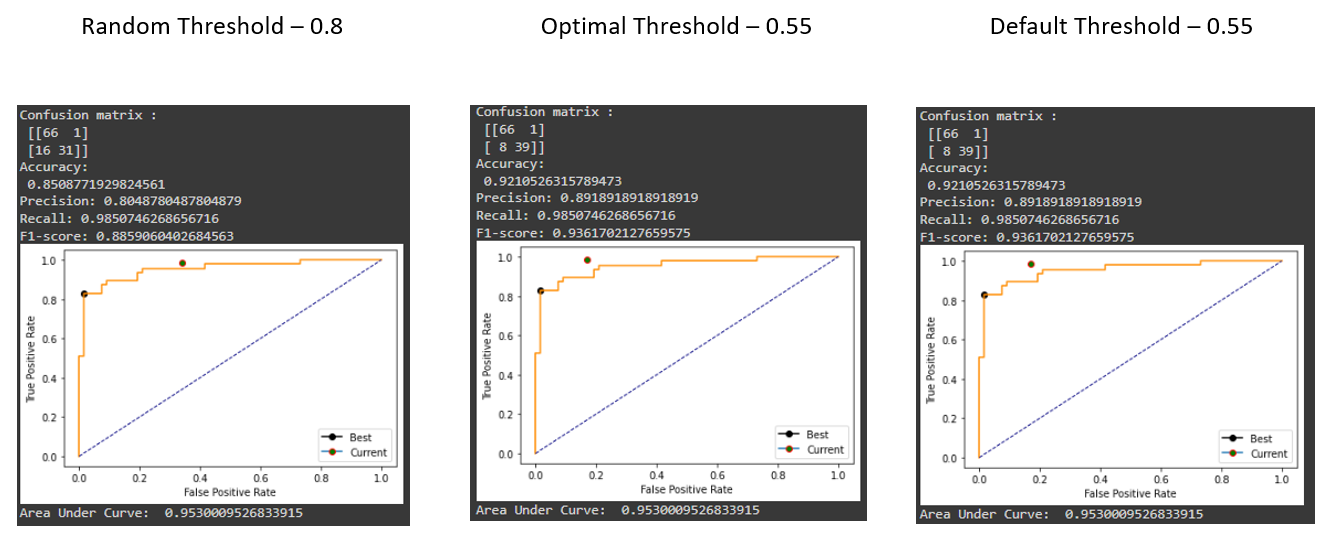**

## Task 3
Compare the two models in terms of their ROCs and AUC. Which one is the best? Explain. Add screenshots

**By comparing the ROCs and AUC score of the two models, Logistic Regression turns out to be better among the two. The more area a model can cover, the better it is. Their comparison side by side can be seen below.**
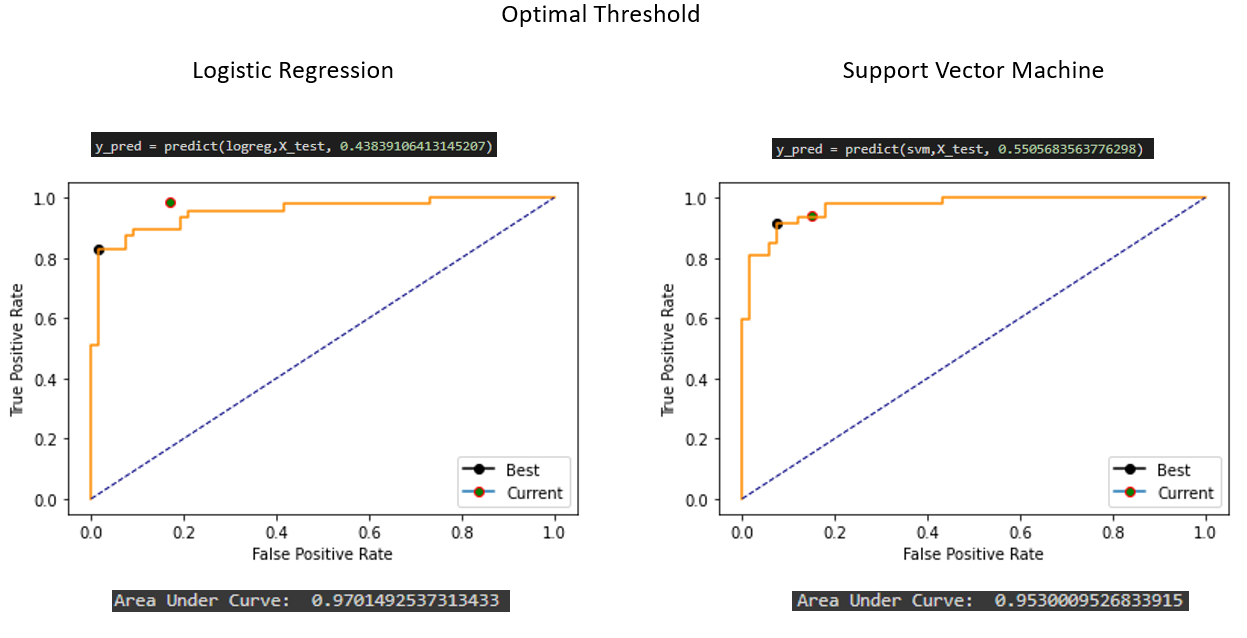